## **Eduardo Carrasco Vidal** <img src="img/logo.png" align="right" style="width: 120px;"/>

**Doctorado en Ingeniería de Sistemas Complejos, Universidad Adolfo Ibáñez.**

**Profesor:** Gonzalo Ruz Heredia.
__Ayudante:__ Carlos Sepúlveda Morales.

**Curso:** Machine Learning (Aprendizaje Automático).

Enlace al repositorio del alumno en [GitHub](https://github.com/educarrascov/DISC_MachineLearning) _@educarrascov_

![Python](https://img.shields.io/badge/python-%2314354C.svg) 

____

## Instrucciones
* La tarea es individual
* Por favor responder en este mismo notebook
* Renombrar el archivo agregando su nombre, por ejemplo tarea1_Tupper_Tudor.ipynb
* Subir el archivo al link de entrega Trabajo en webcursos que será habilitado
* __Fecha de entrega:__ viernes 26 de agosto, 23:55 hrs.

____

# Tarea Nº 1: Machine Learning:

Los datos bankData.csv corresponden a una campaña de marketing dirigido (por teléfono) de un banco portugués. El objetivo de clasificación es poder predecir si el cliente va a tomar o no un depósito a plazo (variable “y” ubicada en la última columna de la tabla) en función de un conjunto de 18 atributos descritos en el archivo [Atributos.pdf](https://github.com/educarrascov/DISC_MachineLearning/blob/main/Tareas/tarea1/Atributos.pdf). 
Cargue el conjunto de datos (bankData.csv) en este notebook y responda las preguntas.

Detalle de cada variable con descripción y tipo, se puede observar en el siguiente cuadro:

| Nº                 | Variable     | Descripción   | Tipo         |
|--------------------|--------------|---------------|--------------|
| 1                  | Age          | Edad          |Numérico      |
| 2                  | Education    | Educación             |Categórico    |
| 3                  | Default      | has credit in default?  |Categórico    |
| 4                  | Housing      | has housing loan?             |Categórico    |
| 5                  | Loan         | has personal loan?             |Categórico    |
| 6                  | Contact      | contact communication type            |Categórico    |
| 7                  | Month        | last contact month of year              |Categórico    |
| 8                  | Day_of_Week  | last contact day of the week            |Categórico    |
| 9                  | Duration     | last contact duration, in seconds              |Numérico      |
| 10                 | Campaign     | number of contacts performed during this campaign and for this client|Numérico      |
| 11 | pdays | number of days that passed by after the client was last contacted from a previous campaign|Numérico      |
| 12 | previous     | number of contacts performed before this campaign and for this client|Numérico      |
| 13                 | poutcome     | outcome of the previous marketing campaign             |Categórico    |
| 14                 | emp.var.rate | employment variation rate - quarterly indicator              |Numérico      |
| 15                 | cons.price.idx| consumer price index - monthly indicator           |Numérico      |
| 16                 | cons.conf.idx| consumer confidence index - monthly indicator              |Numérico      |
| 17                 | euribor3m    | euribor 3 month rate - daily indicator             |Numérico      |
| 18                 | nr.employed  | number of employees - quarterly indicator             |Numérico      |
| 19 **(output)**    | `y`          | has the client subscribed a term deposit?             |Categórico    |

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt 
from matplotlib.pyplot import figure
data1 = pd.read_csv('data/bankData.csv', sep=',')

In [3]:
data1.info() #verificar cantidad de columnas/filas, tipos de variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   education       4119 non-null   object 
 2   default         4119 non-null   object 
 3   housing         4119 non-null   object 
 4   loan            4119 non-null   object 
 5   contact         4119 non-null   object 
 6   month           4119 non-null   object 
 7   day_of_week     4119 non-null   object 
 8   duration        4119 non-null   int64  
 9   campaign        4119 non-null   int64  
 10  pdays           4119 non-null   int64  
 11  previous        4119 non-null   int64  
 12  poutcome        4119 non-null   object 
 13  emp.var.rate    4119 non-null   float64
 14  cons.price.idx  4119 non-null   float64
 15  cons.conf.idx   4119 non-null   float64
 16  euribor3m       4119 non-null   float64
 17  nr.employed     4119 non-null   f

In [4]:
data1.describe(include='all') #Estadísticas descriptivas básicas por cada variable

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1264,3315,2175,3349,2652,1378,860,NaN,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.788055,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.703736,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [5]:
missing = data1.isnull().sum()
missing.sort_values(ascending=False)

age               0
pdays             0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
campaign          0
education         0
duration          0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
y                 0
dtype: int64

In [6]:
data1.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## A. Variables Categóricas:

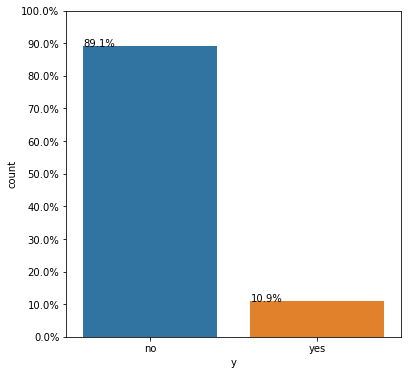

In [7]:
figure(figsize=(6,6))
total=len(data1['y'])
plot=sns.countplot(x=data1['y'],data=data1)

for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.pyplot.show()

In [8]:
def countplot_target_variable(columns,classes):
    figure(figsize=(12,5))
    total=len(data1[classes])
    plot=sns.countplot(x=columns,data=data1,hue=classes)
    for p in plot.patches:
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.pyplot.show()

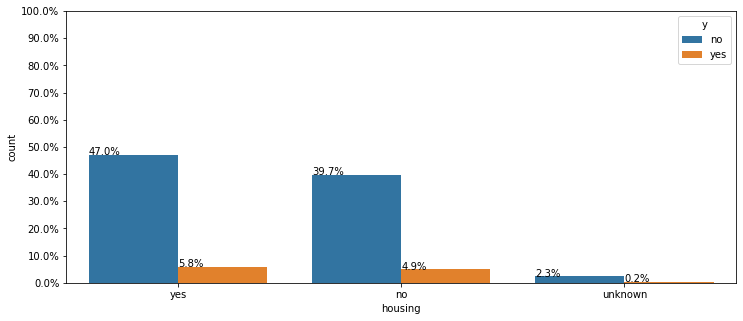

In [9]:
countplot_target_variable('housing','y')

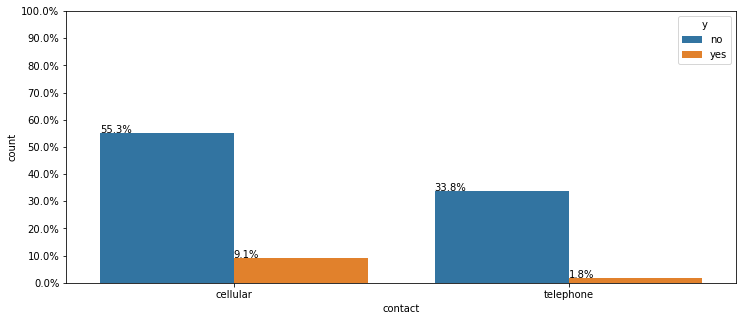

In [10]:
countplot_target_variable('contact','y')

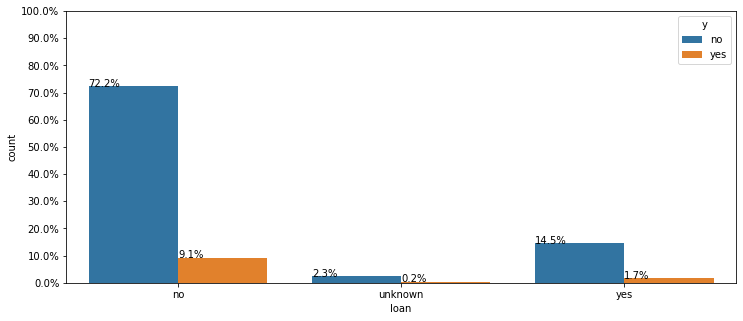

In [11]:
countplot_target_variable('loan','y')

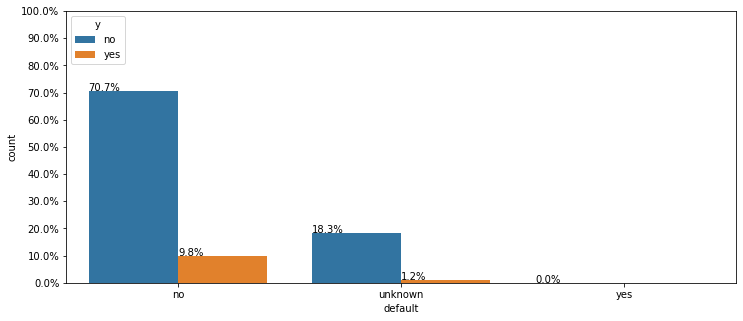

In [12]:
countplot_target_variable('default','y')

## B. Variables Numéricas:

In [13]:
def plotting_kd(data1,columns,hue=None):
    if hue==None:    
       plot=sns.FacetGrid(data1,height=6).map(sns.histplot,columns)
    else:
        plot=sns.FacetGrid(data1,hue=hue,height=6).map(sns.histplot,columns)
        plt.pyplot.legend()

In [14]:
def violinplot_columns(columns,y='y'):
    figure(figsize=(8,4))
    sns.violinplot(x=data1[y],y=data1[columns],hue=data1['y'],showfliers=False)
    plt.pyplot.title(columns.upper())

### 1. Plotting de la variable _Age_:

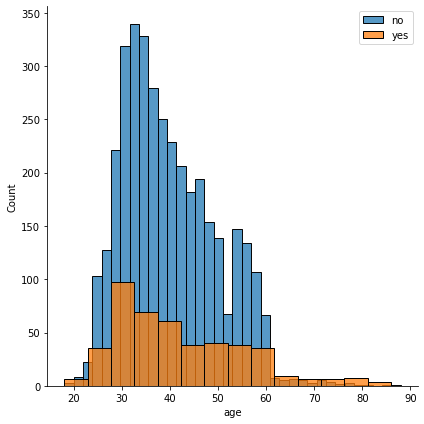

In [15]:
plotting_kd(data1,'age',hue='y')

### 2. Plotting de la Variable _Duration_:

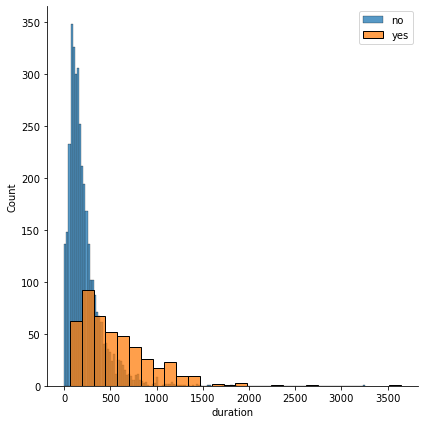

In [16]:
plotting_kd(data1,'duration',hue='y')

### 3. Matriz de Correlación:

In [17]:
def plotting_heatmap(data1):
    correlation=data1.corr()
    figure(figsize=(12,8))
        
        
    sns.heatmap(correlation, annot=True)
    plt.pyplot.show()

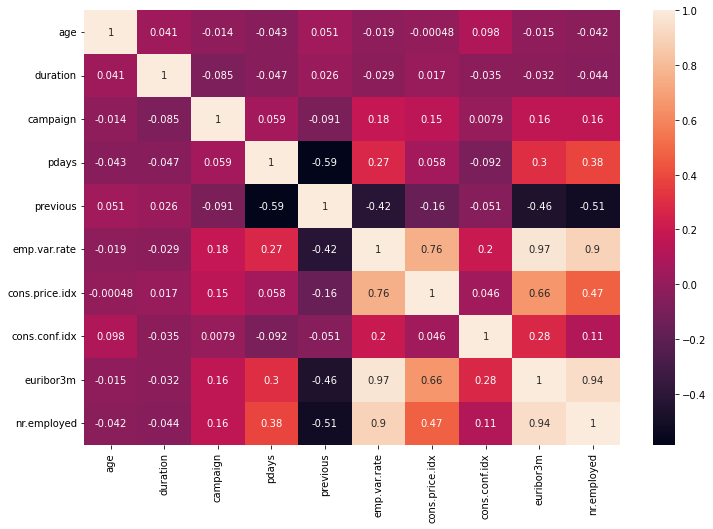

In [18]:
plotting_heatmap(data1) #obtener una matriz de correlación de valores numéricos

### 4.Tranformación de variables categóricas a numéricas:

In [22]:
cat_cols = data1.select_dtypes(include=['object']).columns.to_list()
numeric_cols = data1.select_dtypes(include=['float64', 'int64']).columns.to_list()

In [23]:
for v in cat_cols:
    data1[v],_ = pd.factorize(data1[v],sort=False)

In [24]:
data1.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,0,0,0,0,0,0,0,487,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,1,0,1,0,1,0,0,346,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,1,0,0,0,1,1,1,227,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,0,0,2,1,1,1,0,17,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,2,0,0,0,0,2,2,58,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,0


In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   education       4119 non-null   int64  
 2   default         4119 non-null   int64  
 3   housing         4119 non-null   int64  
 4   loan            4119 non-null   int64  
 5   contact         4119 non-null   int64  
 6   month           4119 non-null   int64  
 7   day_of_week     4119 non-null   int64  
 8   duration        4119 non-null   int64  
 9   campaign        4119 non-null   int64  
 10  pdays           4119 non-null   int64  
 11  previous        4119 non-null   int64  
 12  poutcome        4119 non-null   int64  
 13  emp.var.rate    4119 non-null   float64
 14  cons.price.idx  4119 non-null   float64
 15  cons.conf.idx   4119 non-null   float64
 16  euribor3m       4119 non-null   float64
 17  nr.employed     4119 non-null   f

Para las siguientes preguntas, considere las siguientes particiones de los datos

In [27]:
#primera partición
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data1.iloc[:,0:18],data1['y'],
    test_size=0.3, random_state=0)

#segunda partición
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train,y_train,
    test_size=0.2, random_state=0)

## Pregunta 1
Usando `X_train2` (para entrenamiento) y `X_val` (para evaluación), explore una profundidad adecuada para un árbol de decisión tal que no sobreajuste. Luego, entrene un árbol de decisión (con la profundidad determinada previamente) usando el conjunto de entrenamiento `X_train` y entregue el porcentaje de clasificaciones correctas al evaluar el modelo con el conjunto de prueba `X_test`. Grafique el árbol resultante. Señale qué le cuesta más predecir al clasificador: un cliente que si va a tomar un depósito a plazo o un cliente que no va a tomar un depósito a plazo. Justifique su respuesta.

### Respuesta:

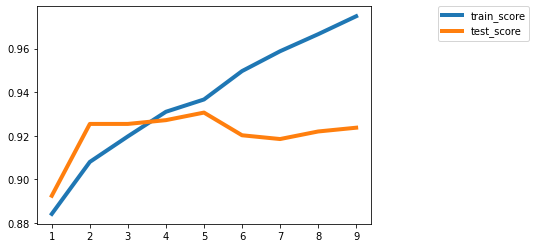

In [33]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_score = []
test_score = []

for depth in range(1,10):
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth).fit(X_train2, y_train2)
    train_score.append(tree.score(X_train2, y_train2))
    test_score.append(tree.score(X_val, y_val))
plt.plot(range(1,10), train_score, label="train_score", linewidth=4)
plt.plot(range(1,10), test_score, label="test_score", linewidth=4)
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.);

In [34]:
# Profundidad encontrada 5
#-------------------------------------------------
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [45]:
from sklearn.metrics import accuracy_score
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El porcentaje de clasificaciones correctas es: {100 * round(accuracy,2)} %")

El porcentaje de clasificaciones correctas es: 89.0 %


Profundidad del árbol: 5
Número de nodos terminales: 30


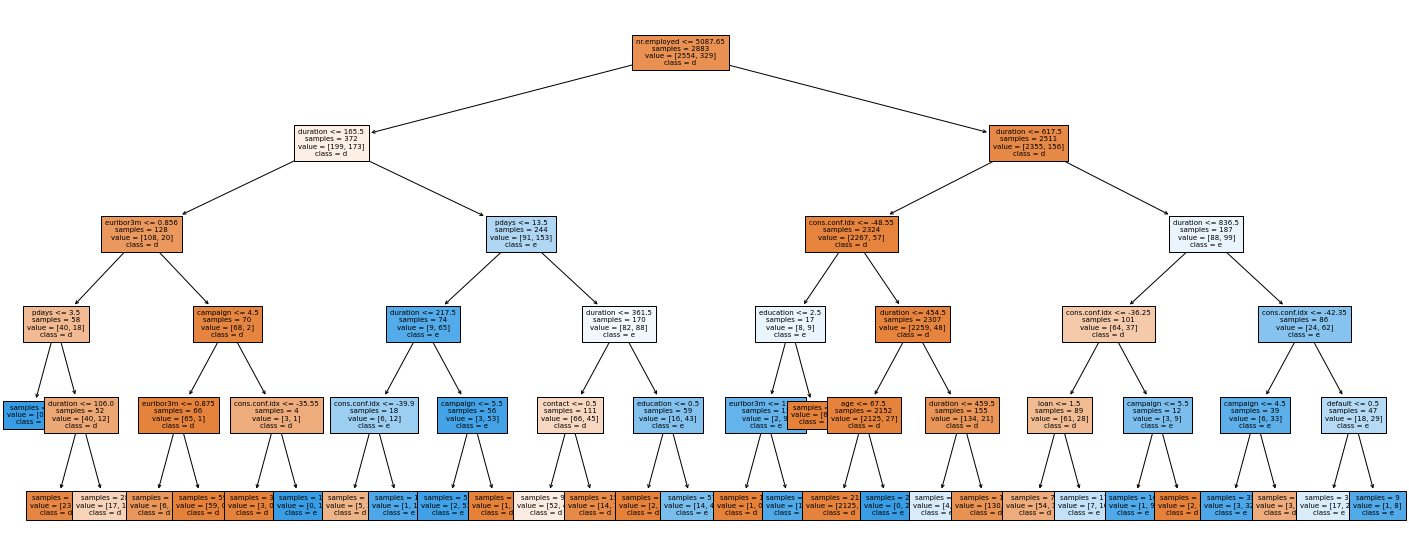

In [46]:
from sklearn.tree import plot_tree

# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(25, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = data1.drop(columns = 'y').columns.tolist(),
            class_names   = 'deposito_plazo',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

In [48]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones)
print(cf_matrix)

[[1058   56]
 [  79   43]]


<AxesSubplot:>

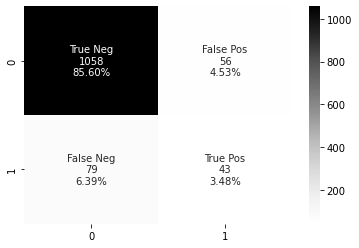

In [63]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

In [42]:
print(f"Porc. de error para el NO: {round(cf_matrix[0,1]/cf_matrix[0].sum(),2)*100}%")
print(f"Porc. de error para el SI: {round(cf_matrix[1,0]/cf_matrix[1].sum(),2)*100}%")

Porc. de error para el NO: 5.0%
Porc. de error para el SI: 65.0%


## Pregunta 2
En base al árbol resultante. Cuál es el atributo más importante para este problema de clasificación. Qué atributos no contribuyen (son irrelevantes) para este problema de clasificación.

### Respuesta

In [60]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': data1.drop(columns = 'y').columns,
                             'importancia': modelo.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
8,duration,0.468225
17,nr.employed,0.311258
15,cons.conf.idx,0.058589
10,pdays,0.058534
9,campaign,0.023989
1,education,0.021885
16,euribor3m,0.020015
5,contact,0.011776
0,age,0.011550
4,loan,0.009310


In [61]:
vec = importancia_predictores.sort_values('importancia', ascending=False)
vec[vec['importancia']<=0]['predictor'].to_list()

['month',
 'day_of_week',
 'housing',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx']

## Suerte!